Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 2.907470500
Epoch: 0002, Cost: 1.110679806
Epoch: 0003, Cost: 0.876817511
Epoch: 0004, Cost: 0.764888865
Epoch: 0005, Cost: 0.694936852
Epoch: 0006, Cost: 0.645926932
Epoch: 0007, Cost: 0.608458303
Epoch: 0008, Cost: 0.578382408
Epoch: 0009, Cost: 0.554424049
Epoch: 0010, Cost: 0.534207992
Epoch: 0011, Cost: 0.517071448
Epoch: 0012, Cost: 0.501640469
Epoch: 0013, Cost: 0.488547715
Epoch: 0014, Cost: 0.476902753
Epoch: 0015, Cost: 0.466554242
Learning finished!
Accuracy:  0.8911
Label:  [8]
Prediction:  [8]


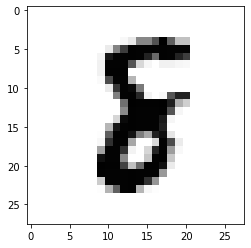

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

X = tf.placeholder(tf.float32, shape=[None,784])
Y = tf.placeholder(tf.float32, shape=[None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y ,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(num_epochs):
        avg_cost = 0
        
        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations
            
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
    
    print("Learning finished!")
    
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict = {X: mnist.test.images, Y: mnist.test.labels}
        ),
    )
    
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()

